## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mtb
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


## Loadind Data

In [2]:
df = pd.read_csv("Skin_NonSkin.txt",header=None,delimiter='\t')
df.columns = ["Blue","Green","Red","Skin"]
df.head(2)

,Blue,Green,Red,Skin
0,74,85,123,1
1,73,84,122,1


## Plotting Colors & Skin/Not-Skin

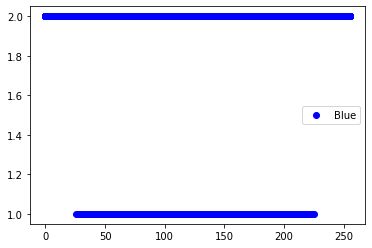

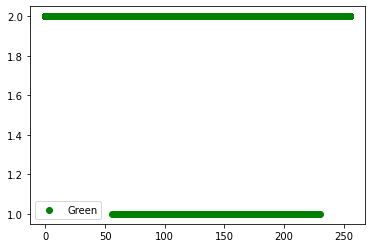

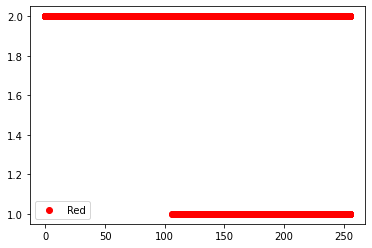

In [6]:
target = 'Skin'
features = df.columns[:-1]
non_skin_df = df[df.Skin == 2]
skin_df = df[df.Skin == 1]


for feature in features:
    plt.scatter(df[feature],df.Skin,label=feature, color=feature)
    plt.legend()
    plt.show()


## Relation of Colors in Skin Samples
(Following figures tell that the colors are a skin sample when they have a linear relation between them. So, there is a balance. If some sample has more blue, it will also have red and green more). The classifier will make classifications based on the probabilties. If blue is 40 and red is 70 and green is 50, it is likely to be a skin sample. (This is also predicted as Skin color in last block)

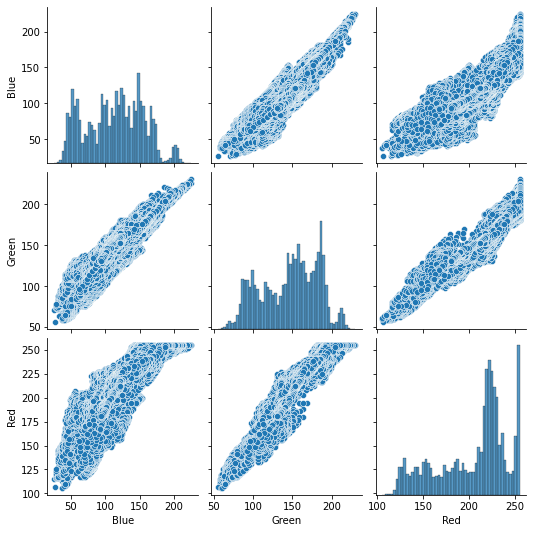

In [7]:
sns.pairplot(skin_df[features])


<AxesSubplot:>

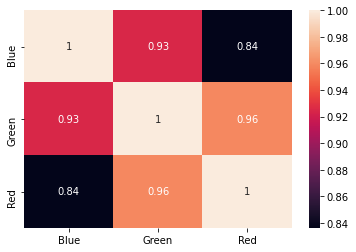

In [14]:
sns.heatmap(skin_df[features].corr(),annot=True)

## Relation of Colors in Non-Skin Samples

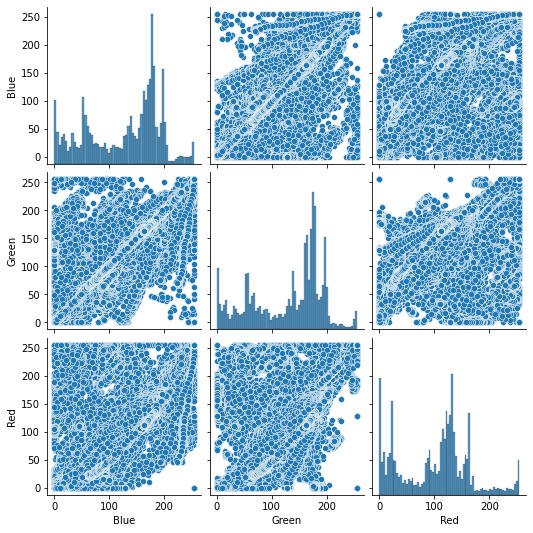

In [8]:
sns.pairplot(non_skin_df[features])


<AxesSubplot:>

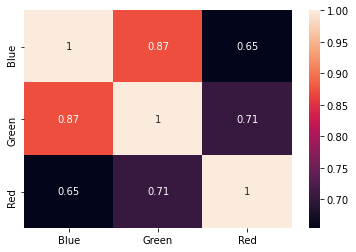

In [17]:
sns.heatmap(non_skin_df[features].corr(),annot=True)

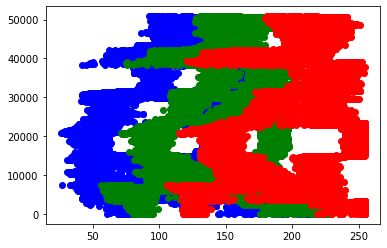

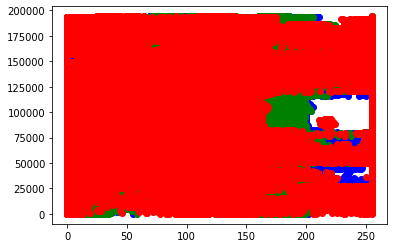

In [19]:
skin_indexes = list(range(1,len(skin_df)+1))
non_skin_indexes = list(range(1,len(non_skin_df)+1))

for feature in features:
    plt.scatter(skin_df[feature],skin_indexes,label=feature, color=feature)
# plt.legend()
plt.show()

for feature in features:
    plt.scatter(non_skin_df[feature],non_skin_indexes,color=feature)
# plt.legend()
plt.show()


## Splitting Train/Test Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.33, random_state=42)

## Naive Bayes Classifier (Multinomial)

In [21]:
classifier = MultinomialNB()

In [22]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [23]:
results = classifier.predict(x_test)

In [25]:
round(classifier.score(x_test,y_test),2)

0.94

In [70]:
classifier.predict([[40,50,70]])

array([1])

In [68]:
# skin sample
probabilities = (classifier.predict_proba([[40,50,70]])) 
"Skin Probability : ",round(probabilities[0][0],4)

('Skin Probability : ', 0.9995)